In [1]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
import keras  
import pandas as pd

In [2]:
dataset = pd.read_csv('Train.csv', encoding = "ISO-8859-1") # lectura de datos
dataset1 = pd.read_csv('Test.csv', encoding = "ISO-8859-1") # lectura de datos


In [3]:
dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

dataset1.replace([np.inf, -np.inf], -1, inplace=True) 
dataset1.replace([np.nan, -np.nan], -1, inplace=True)

In [4]:
#Eliminamos los datos mal introducidos
dataset = dataset.drop(dataset[dataset['Dst Port']=='Dst Port'].index)
dataset1 = dataset1.drop(dataset1[dataset1['Dst Port']=='Dst Port'].index)

dataset = dataset[dataset['Flow IAT Min'] >= 0]
dataset1 = dataset1[dataset1['Flow IAT Min'] >= 0]
#Eliminamos las columnas innecesarias

dataset = dataset.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min'], axis=1)
dataset1 = dataset1.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min'], axis=1)
#Quitamos direcciones IP dest y src para no introducir sesgos, lo mismo con los puertos
#Quitar el puerto de destino es una modificación con respecto al trabajo original
#Eliminamos la columna de timestamp para no tener sesgo
dataset1 = dataset1.drop(['Timestamp'], axis=1)
dataset = dataset.drop(['Timestamp'], axis=1)

#Eliminamos la columna 
dataset

Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0              6        3025021            11            15            336.0   
1              6            468             2             1             79.0   
2              6        3054906            13            15            338.0   
3              6        3046116            11            15            341.0   
4              6        3045413            13            15            351.0   
...          ...            ...           ...           ...              ...   
430151        17           9264             1             1             47.0   
430152         0       91444297            51             0              0.0   
430153        17      101164777             6             6           1332.0   
430154        17      101009912             6             6           1332.0   
430155        17           5614             1             1             49.0   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 188.0             79.0              0.0         30.545455   
1                   0.0             79.0              0.0         39.500000   
2                 188.0             79.0              0.0         26.000000   
3                 188.0             79.0              0.0         31.000000   
4                 188.0             86.0              0.0         27.000000   
...                 ...              ...              ...               ...   
430151             63.0             47.0             47.0         47.000000   
430152              0.0              0.0              0.0          0.000000   
430153           1032.0            222.0            222.0        222.000000   
430154           1032.0            222.0            222.0        222.000000   
430155             65.0             49.0             49.0         49.000000   

        Fwd Pkt Len Std  ...  Fwd Act Data Pkts  Active Mean  Active Std  \
0             38.624768  ...                  6            0           0   
1             55.861436  ...                  0            0           0   
2             36.398260  ...                  6            0           0   
3             38.348403  ...                  6            0           0   
4             37.678464  ...                  6            0           0   
...                 ...  ...                ...          ...         ...   
430151         0.000000  ...                  0            0           0   
430152         0.000000  ...                  0            0           0   
430153         0.000000  ...                  5            0           0   
430154         0.000000  ...                  5            0           0   
430155         0.000000  ...                  0            0           0   

        Active Max  Active Min     Idle Mean      Idle Std      Idle Max  \
0                0           0  1.641321e+15  9.194970e+05  1.641321e+15   
1                0           0  0.000000e+00  0.000000e+00  0.000000e+00   
2                0           0  1.641321e+15  9.113864e+05  1.641321e+15   
3                0           0  1.641321e+15  9.216062e+05  1.641321e+15   
4                0           0  1.641321e+15  9.112821e+05  1.641321e+15   
...            ...         ...           ...           ...           ...   
430151           0           0  0.000000e+00  0.000000e+00  0.000000e+00   
430152           0           0  1.614000e+15  2.329123e+14  1.646939e+15   
430153           0           0  1.646939e+15  3.197853e+07  1.646939e+15   
430154           0           0  1.646939e+15  3.191661e+07  1.646939e+15   
430155           0           0  0.000000e+00  0.000000e+00  0.000000e+00   

            Idle Min           Label  
0       1.641321e+15  FTP-BruteForce  
1       0.000000e+00  FTP-BruteForce  
2       1.641321e+15  FTP-BruteForce  
3       1.641321e+15  FTP-BruteForce  
4       1.641321e+15  FTP-BruteForce  
...              ...             ...  

In [5]:
n=0
for column in dataset:
    column
    if column != 'Label':
        dataset[column] = dataset[column].astype(float)
        
n=0
for column in dataset1:
    column
    if column != 'Label':
        dataset1[column] = dataset1[column].astype(float)


In [6]:
#dataset.loc[(dataset.Label != 'Benign'),'Label']='Evil'
#dataset1.loc[(dataset1.Label != 'Benign'),'Label']='Evil'
# Solo se utiliza para detectar malo o bueno

#dataset = dataset.drop(dataset[dataset['Label'] == 'Evil'].sample(frac=.8).index)
#dataset1 = dataset1.drop(dataset1[dataset1['Label'] == 'Evil'].sample(frac=.8).index)

dataset

Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0            6.0      3025021.0          11.0          15.0            336.0   
1            6.0          468.0           2.0           1.0             79.0   
2            6.0      3054906.0          13.0          15.0            338.0   
3            6.0      3046116.0          11.0          15.0            341.0   
4            6.0      3045413.0          13.0          15.0            351.0   
...          ...            ...           ...           ...              ...   
430151      17.0         9264.0           1.0           1.0             47.0   
430152       0.0     91444297.0          51.0           0.0              0.0   
430153      17.0    101164777.0           6.0           6.0           1332.0   
430154      17.0    101009912.0           6.0           6.0           1332.0   
430155      17.0         5614.0           1.0           1.0             49.0   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 188.0             79.0              0.0         30.545455   
1                   0.0             79.0              0.0         39.500000   
2                 188.0             79.0              0.0         26.000000   
3                 188.0             79.0              0.0         31.000000   
4                 188.0             86.0              0.0         27.000000   
...                 ...              ...              ...               ...   
430151             63.0             47.0             47.0         47.000000   
430152              0.0              0.0              0.0          0.000000   
430153           1032.0            222.0            222.0        222.000000   
430154           1032.0            222.0            222.0        222.000000   
430155             65.0             49.0             49.0         49.000000   

        Fwd Pkt Len Std  ...  Fwd Act Data Pkts  Active Mean  Active Std  \
0             38.624768  ...                6.0          0.0         0.0   
1             55.861436  ...                0.0          0.0         0.0   
2             36.398260  ...                6.0          0.0         0.0   
3             38.348403  ...                6.0          0.0         0.0   
4             37.678464  ...                6.0          0.0         0.0   
...                 ...  ...                ...          ...         ...   
430151         0.000000  ...                0.0          0.0         0.0   
430152         0.000000  ...                0.0          0.0         0.0   
430153         0.000000  ...                5.0          0.0         0.0   
430154         0.000000  ...                5.0          0.0         0.0   
430155         0.000000  ...                0.0          0.0         0.0   

        Active Max  Active Min     Idle Mean      Idle Std      Idle Max  \
0              0.0         0.0  1.641321e+15  9.194970e+05  1.641321e+15   
1              0.0         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
2              0.0         0.0  1.641321e+15  9.113864e+05  1.641321e+15   
3              0.0         0.0  1.641321e+15  9.216062e+05  1.641321e+15   
4              0.0         0.0  1.641321e+15  9.112821e+05  1.641321e+15   
...            ...         ...           ...           ...           ...   
430151         0.0         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
430152         0.0         0.0  1.614000e+15  2.329123e+14  1.646939e+15   
430153         0.0         0.0  1.646939e+15  3.197853e+07  1.646939e+15   
430154         0.0         0.0  1.646939e+15  3.191661e+07  1.646939e+15   
430155         0.0         0.0  0.000000e+00  0.000000e+00  0.000000e+00   

            Idle Min           Label  
0       1.641321e+15  FTP-BruteForce  
1       0.000000e+00  FTP-BruteForce  
2       1.641321e+15  FTP-BruteForce  
3       1.641321e+15  FTP-BruteForce  
4       1.641321e+15  FTP-BruteForce  
...              ...             ...  

In [7]:
Labels = dataset['Label'].unique()
Y_train = dataset["Label"]
Y_test =  dataset1["Label"]

Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
URG Flag Cnt
CWE Flag Count
ECE Flag Cnt
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Subflow Bwd Pkts
Active Mean
Active Std
Active Max
Active Min


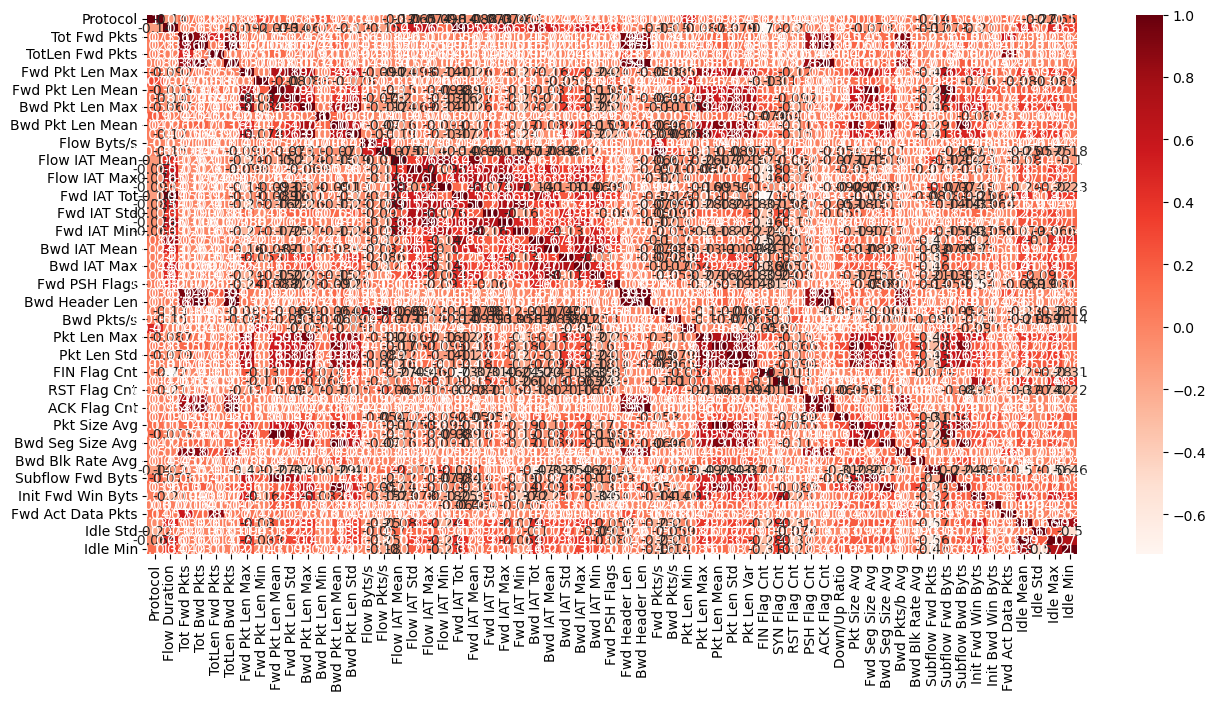

<Figure size 640x480 with 0 Axes>

In [8]:
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

X_train=dataset.iloc[:, 0:76] #Luego obtenemos las características del flujo
X_test=dataset1.iloc[:, 0:76]

sel = VarianceThreshold(threshold=0)
hola=sel.fit_transform(X_train)

aux=X_train.var()

for col in X_train.columns:
    if X_train[col].var() == 0:
        print(col)
        X_train=X_train.drop(col, axis =1)
        X_test=X_test.drop(col, axis =1)
       
        #Aqui iria un drop

plt.figure(figsize=(15, 7))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

features = list(X_train.columns)

plt.savefig('line_plot.svg') 
#pintar solo con colores

In [9]:
from sklearn.preprocessing import LabelEncoder
 
lb_make = LabelEncoder()
Y_train = lb_make.fit_transform(Y_train) #para pasar a numeros


Labels = lb_make.inverse_transform(Y_train)
Labels = list(lb_make.classes_)
Labels

['Benign',
 'DoS attacks-GoldenEye',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Slowloris',
 'FTP-BruteForce',
 'SSH-Bruteforce']

In [10]:
Y_train
unique, counts = np.unique(Y_train, return_counts=True)
counts

array([120096,  52175,  50676,  53848,  53876,  50883,  46928],
      dtype=int64)

In [11]:
unique

array([0, 1, 2, 3, 4, 5, 6])

In [12]:
lb_make = LabelEncoder()
Y_test = lb_make.fit_transform(Y_test)

Labels1 = lb_make.inverse_transform(Y_test)
Labels1 = list(lb_make.classes_)
Labels1
Y_test

array([5, 5, 5, ..., 0, 0, 0])

In [13]:
dataset["Label"].value_counts()

Benign                      120096
DoS attacks-Slowloris        53876
DoS attacks-SlowHTTPTest     53848
DoS attacks-GoldenEye        52175
FTP-BruteForce               50883
DoS attacks-Hulk             50676
SSH-Bruteforce               46928
Name: Label, dtype: int64

In [14]:
unique, counts = np.unique(Y_test, return_counts=True)
counts

array([32228, 10020, 10255, 11110, 11108, 15138, 11956], dtype=int64)

In [15]:
dataset1["Label"].value_counts()

Benign                      32228
FTP-BruteForce              15138
SSH-Bruteforce              11956
DoS attacks-SlowHTTPTest    11110
DoS attacks-Slowloris       11108
DoS attacks-Hulk            10255
DoS attacks-GoldenEye       10020
Name: Label, dtype: int64

In [16]:
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [17]:

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

#scaler = MinMaxScaler().fit(X_train) # Normalizamos los datos
#trainX = scaler.transform(X_train) # Asi se representan los datos

#testT = scaler.transform(X_test)


In [18]:
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(16,12),activation='relu', max_iter=500,random_state=0)
)

In [19]:
X_trainArr=X_train.to_numpy()
Y_train
model.fit(X_trainArr,Y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(16, 12), max_iter=500,
                               random_state=0))])

In [20]:
# evaluate the model Entrenamiento

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_trainArr)
LabelsArr = np.array(Labels)
Labels
LabelsArr

y_test1_text = []
for i in range(0, Y_train.size):
    for j in range(0, LabelsArr.size):
        if Y_train[i] == j:
            y_test1_text.append(Labels[j])

y_pred_text = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_pred_text.append(Labels[j])
            


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test1_text, y_pred_text, digits=8, zero_division= "warn"))

                          precision    recall  f1-score   support

                  Benign  0.99908474 0.99073241 0.99489105    120096
   DoS attacks-GoldenEye  0.98437561 0.96722568 0.97572529     52175
        DoS attacks-Hulk  0.90049624 0.97041992 0.93415141     50676
DoS attacks-SlowHTTPTest  0.97690717 0.94744466 0.96195037     53848
   DoS attacks-Slowloris  0.99795516 0.99643626 0.99719513     53876
          FTP-BruteForce  0.98122741 0.99231570 0.98674041     50883
          SSH-Bruteforce  0.99910941 0.98013979 0.98953370     46928

                accuracy                      0.97977278    428482
               macro avg  0.97702225 0.97781635 0.97716962    428482
            weighted avg  0.98058671 0.97977278 0.97996905    428482



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

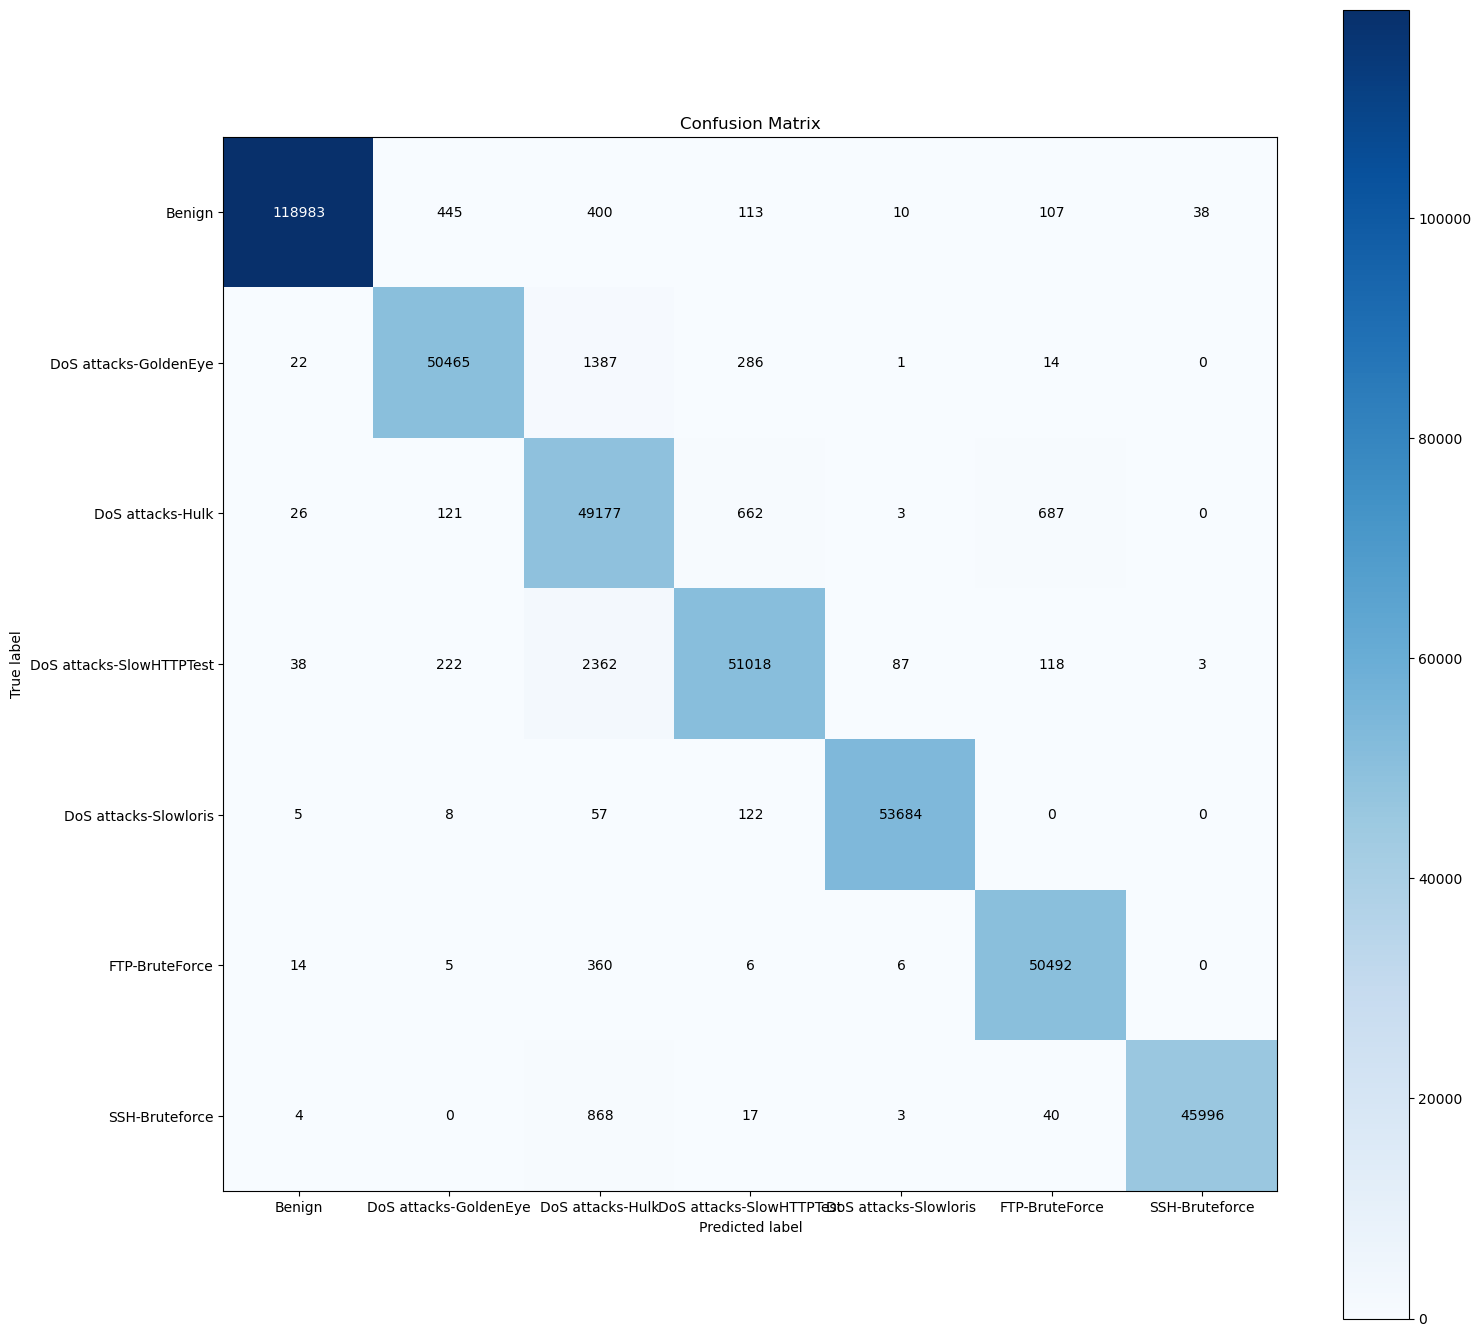

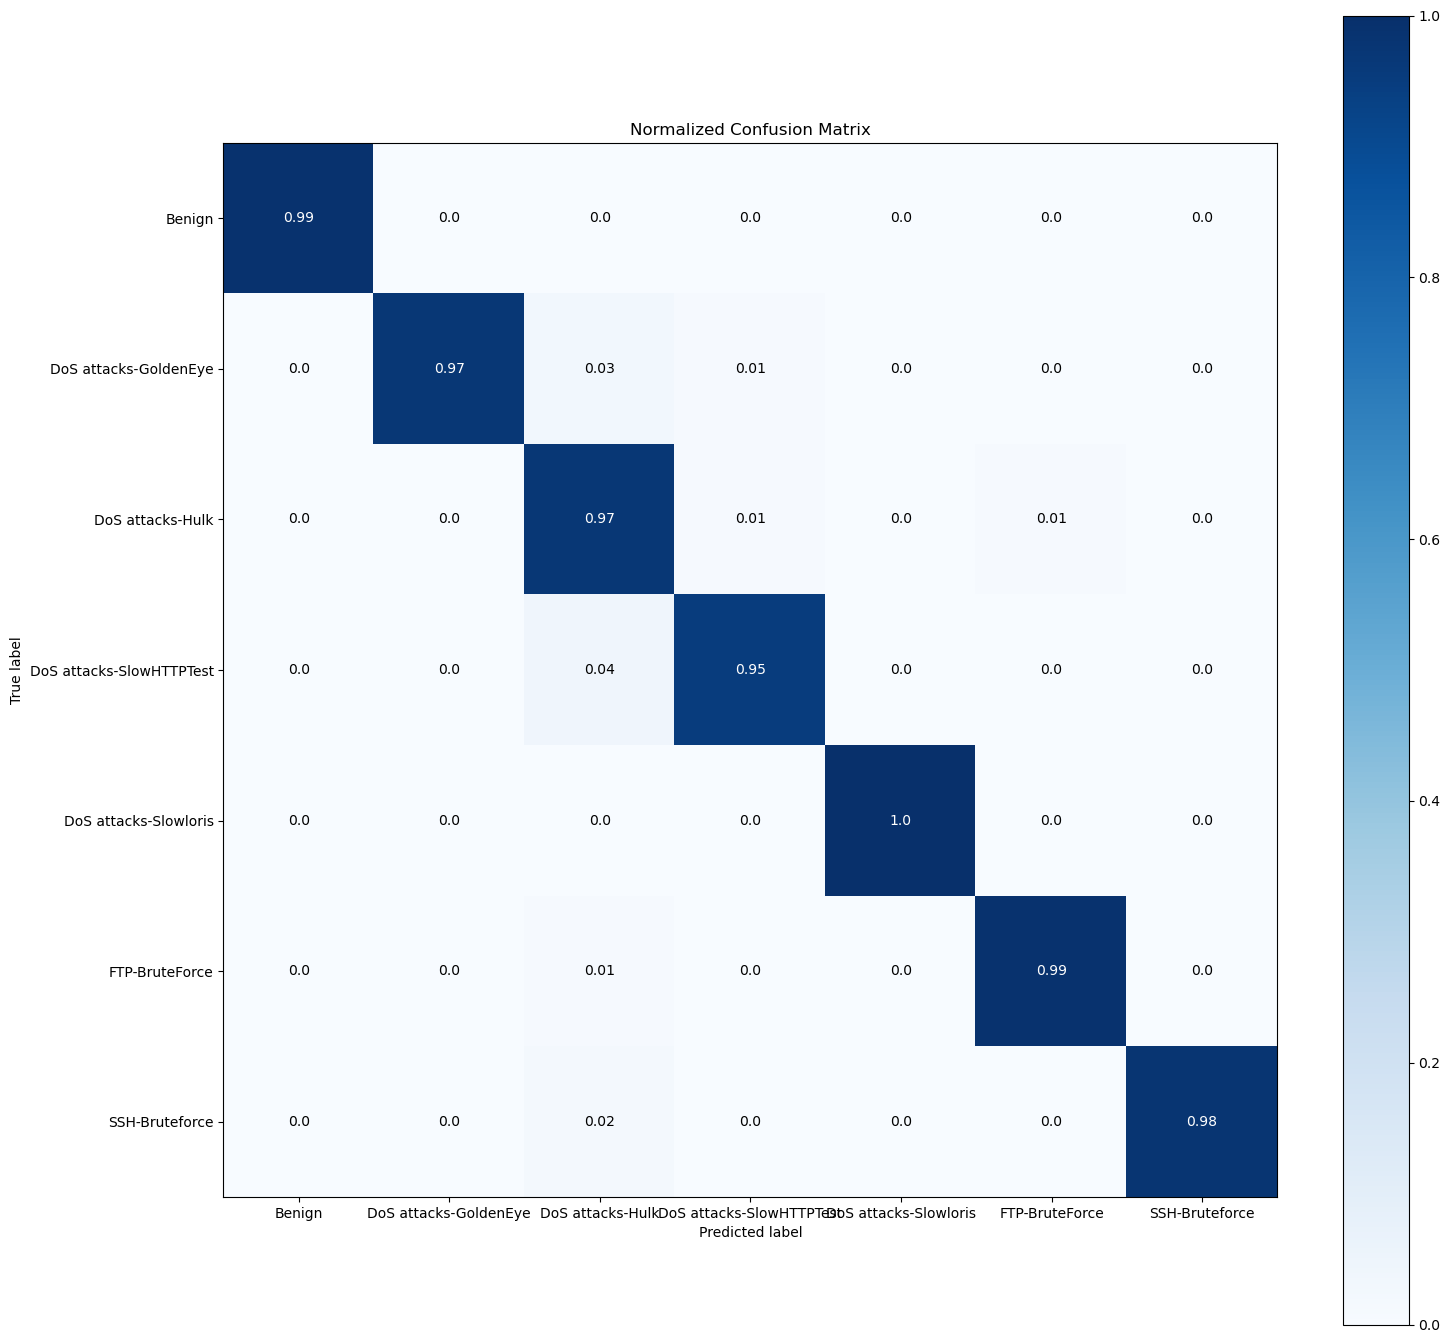

In [22]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (17,17))

In [23]:
# evaluate the model
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_testArr)
LabelsArr = np.array(Labels1)
Labels
LabelsArr

y_test1_text = []
for i in range(0, Y_test.size):
    for j in range(0, LabelsArr.size):
        if Y_test[i] == j:
            y_test1_text.append(Labels[j])

y_pred_text = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_pred_text.append(Labels[j])
            


In [24]:
print(classification_report(y_test1_text, y_pred_text, digits=8, zero_division= "warn"))

                          precision    recall  f1-score   support

                  Benign  0.98008055 0.97402879 0.97704530     32228
   DoS attacks-GoldenEye  0.94312557 0.93173653 0.93739646     10020
        DoS attacks-Hulk  0.92774292 0.95153584 0.93948876     10255
DoS attacks-SlowHTTPTest  0.95417790 0.92403240 0.93886323     11110
   DoS attacks-Slowloris  0.98126421 0.97128196 0.97624757     11108
          FTP-BruteForce  0.96708634 0.99960365 0.98307617     15138
          SSH-Bruteforce  0.99690842 0.99790900 0.99740846     11956

                accuracy                      0.96845259    101815
               macro avg  0.96434084 0.96430402 0.96421799    101815
            weighted avg  0.96851886 0.96845259 0.96839500    101815



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

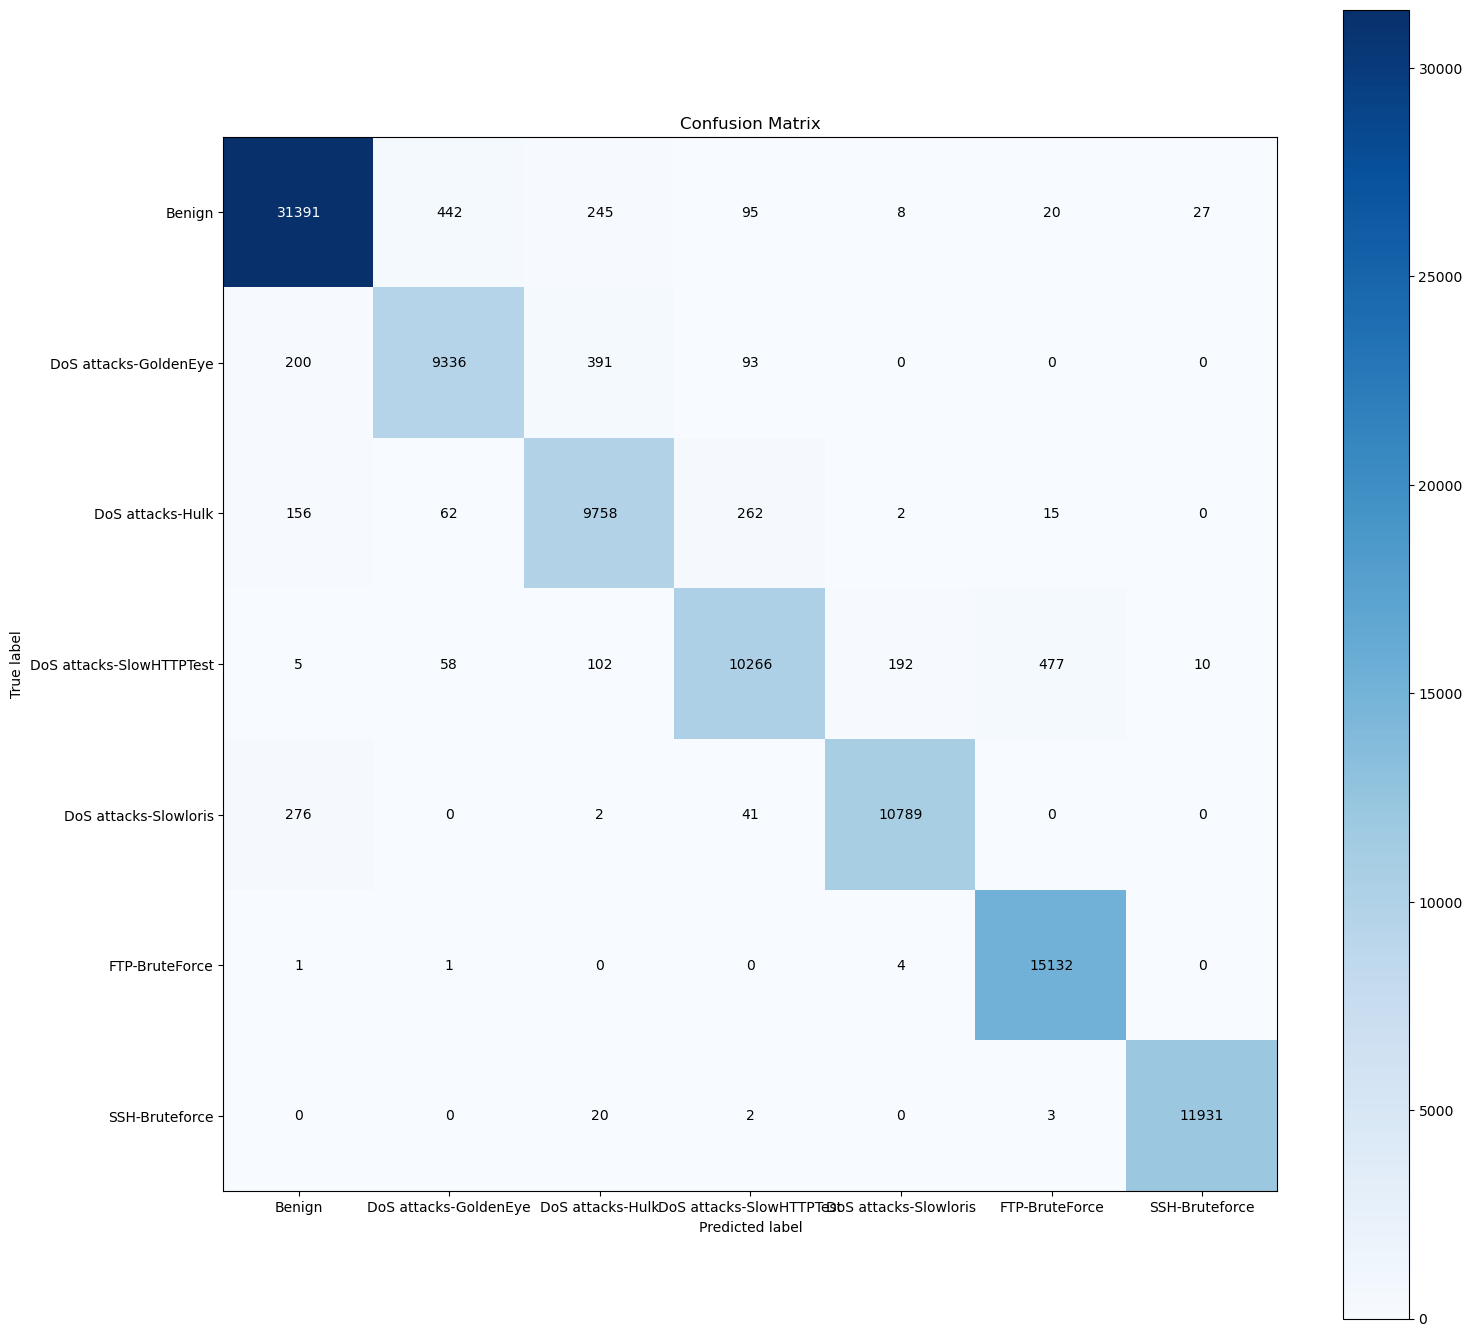

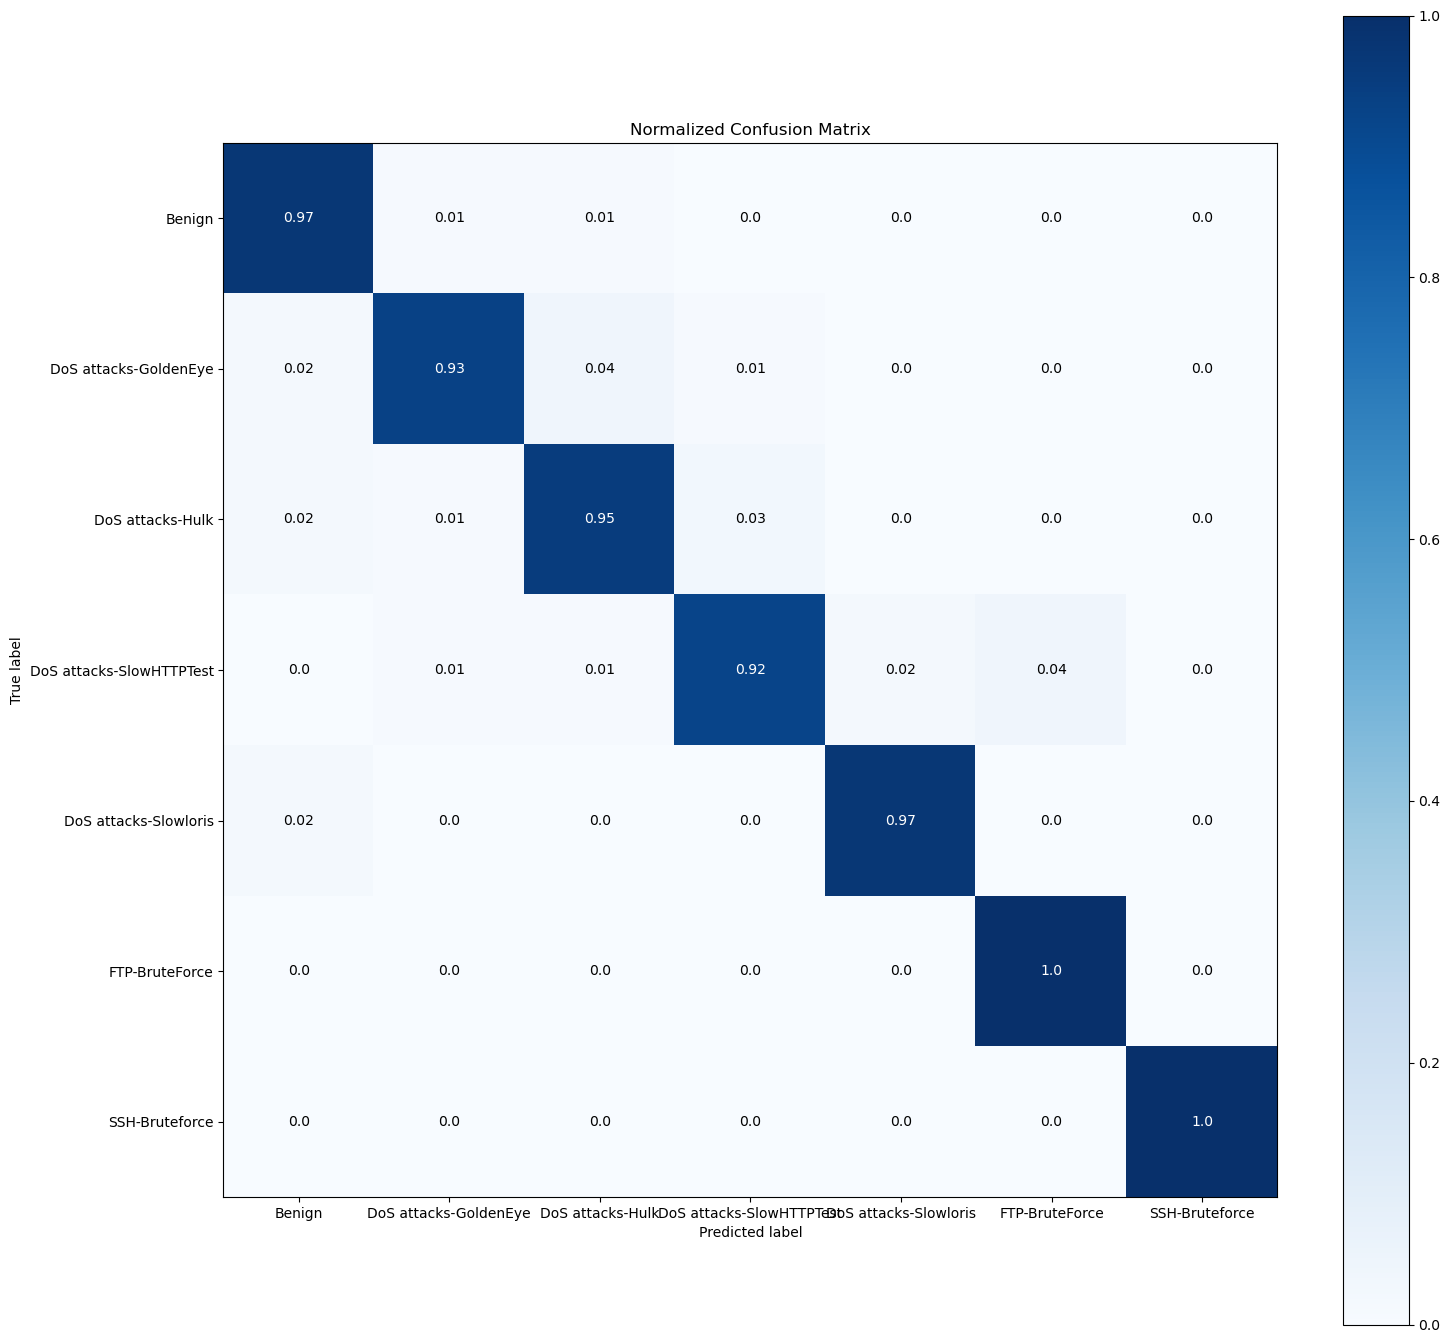

In [25]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (17,17))



In [26]:
size=200
data=shap.sample(X_trainArr, size)
explainer = shap.KernelExplainer(model.predict,data)
expected_value = explainer.expected_value
data1=shap.sample(X_testArr, size)
#shap_values = explainer.shap_values(data1,nsamples=size)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [28]:
#np.savetxt('test1.txt',shap_values)


shap_values = np.loadtxt('test1.txt')

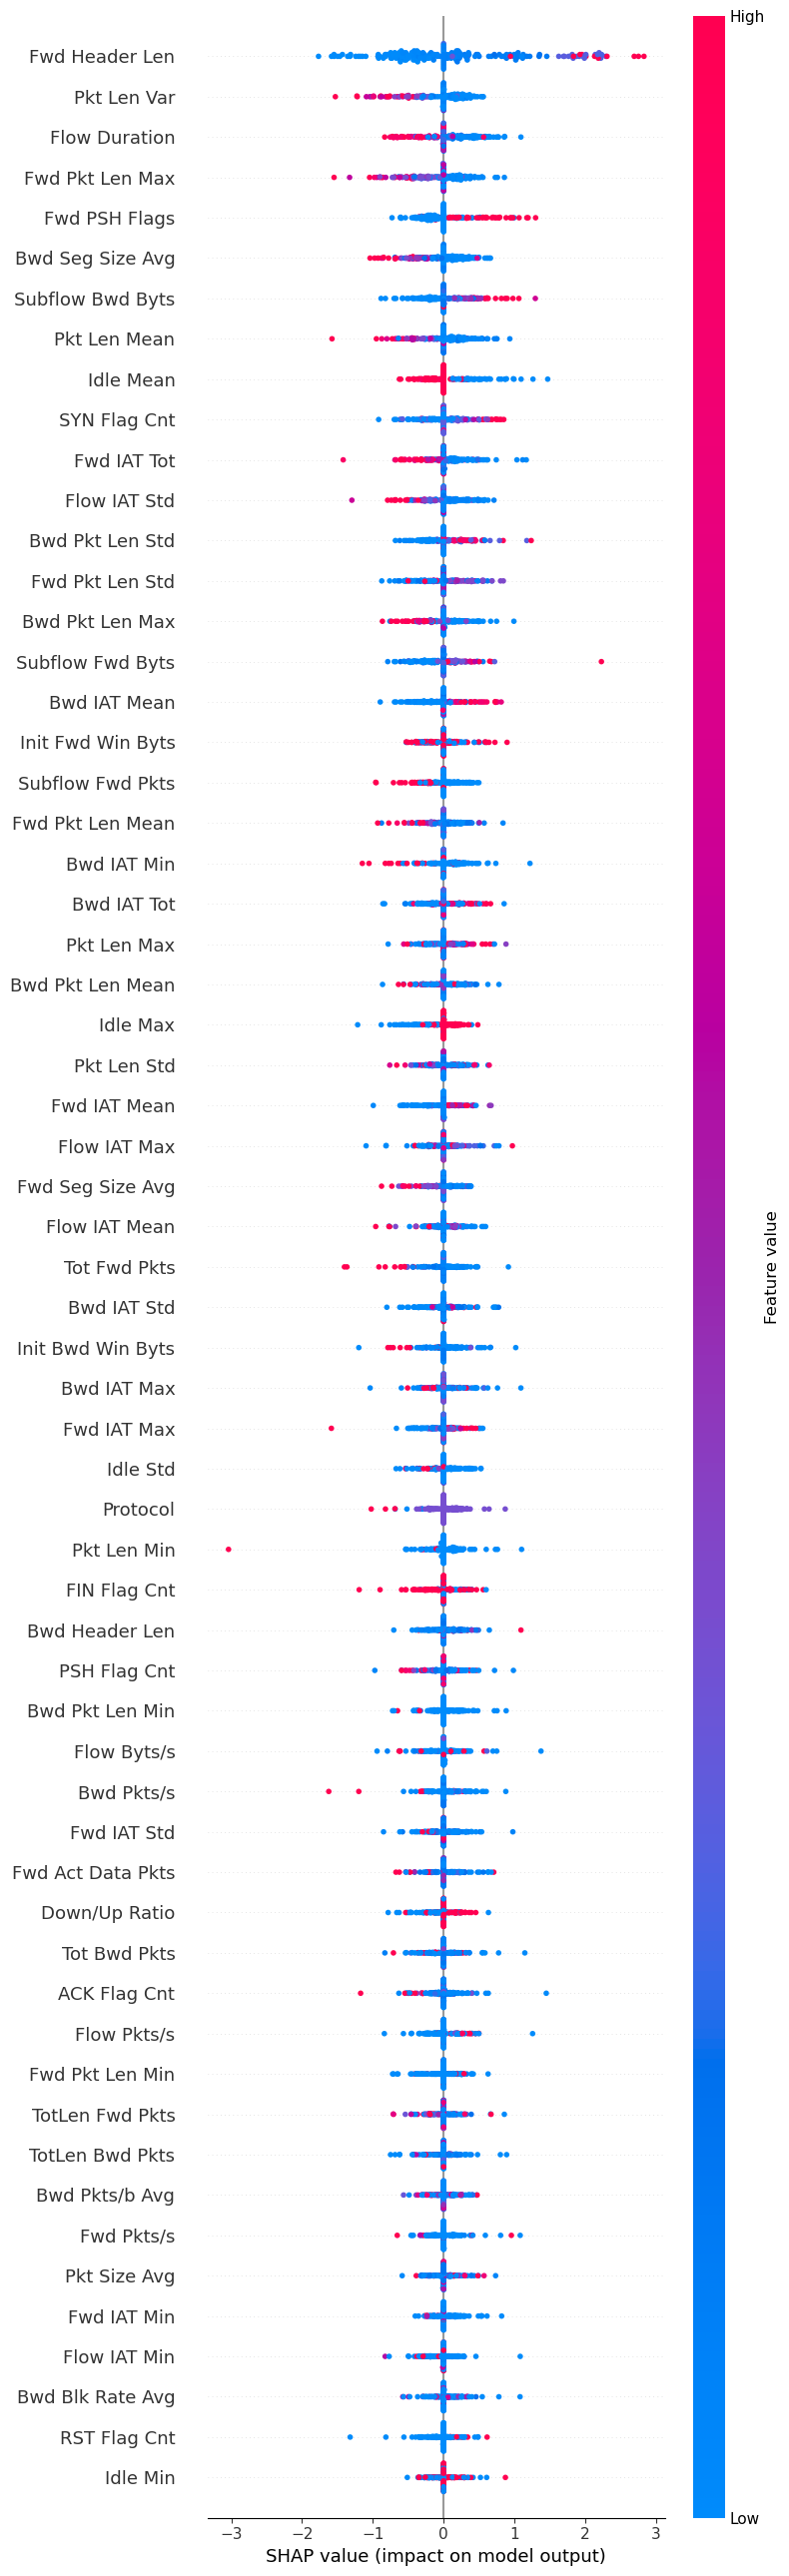

In [29]:
shap.summary_plot(shap_values,data1,feature_names=features, max_display=75)

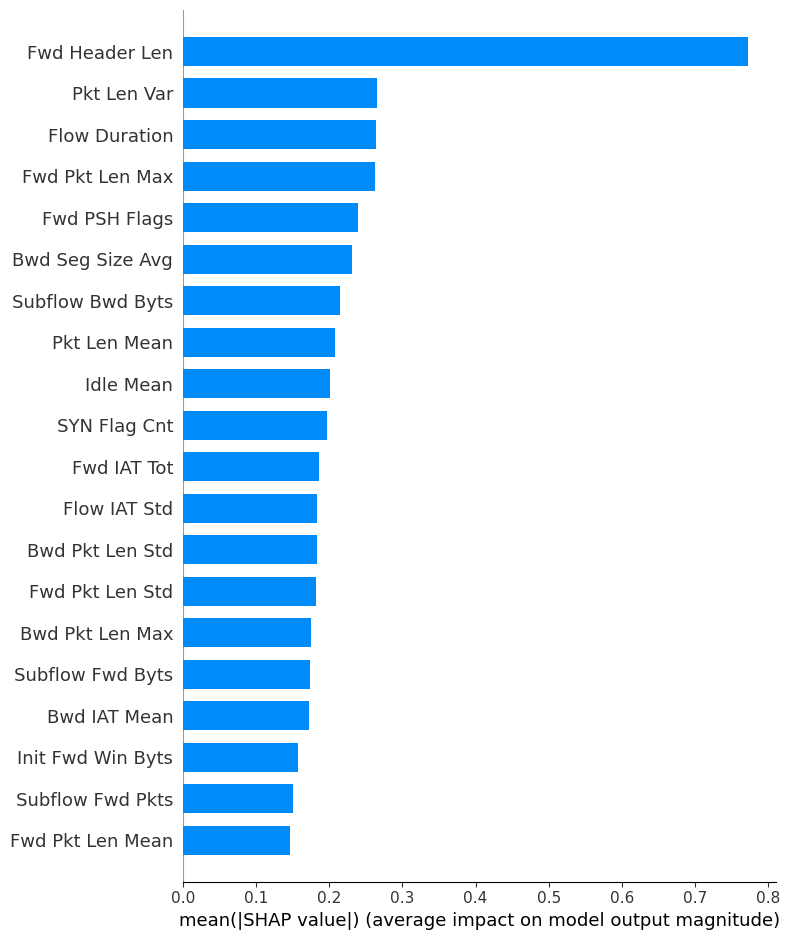

In [30]:
shap.summary_plot(shap_values, data1, plot_type="bar", class_names= Labels1, feature_names = features)

count    428482.000000
mean          0.210144
std           0.407411
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Fwd PSH Flags, dtype: float64


(0.0, 2.0)

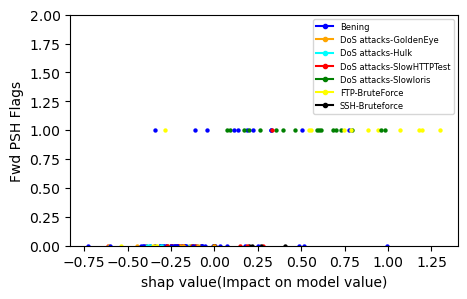

In [48]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#Fwd Seg Size Min,Bwd Pkt Len Std, Fwd Pkt Len Std,Fwd PSH flags,SYN Flag Cnt, Pkt Len Var
#caracteristica='Fwd Header Len'
caracteristica="Fwd PSH Flags"
pos=np.char.find(features,caracteristica, start=0, end=None)
pos =np.where(pos == 0)
pos = int(pos[0])
plt.rcParams["figure.figsize"] = (5,3)
y_preddata=model.predict(data1)

col =[]
x=shap_values[:,pos]
y= data1[:,pos]
for i in range(0, len(data1[:,pos])):
    if y_preddata[i]==0:
        col.append('blue')  
    elif y_preddata[i]==1:
        col.append('orange') 
    elif y_preddata[i]==2:
        col.append('cyan') 
    elif y_preddata[i]==3:
        col.append('red') 
    elif y_preddata[i]==4:
        col.append('green') 
    elif y_preddata[i]==5:
        col.append('yellow') 
    elif y_preddata[i]==6:
        col.append('black')
  

for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 10,linewidth = 0)

plt.ylabel(caracteristica) 
plt.xlabel('shap value(Impact on model value)') 
custom_lines = [Line2D([0], [0], marker='o', color='b',      label='Bening', markersize=3),
                Line2D([0], [0], marker='o', color='orange', label='DoS attacks-GoldenEye', markersize=3),
                Line2D([0], [0], marker='o', color='cyan',   label='DoS attacks-Hulk', markersize=3),
                Line2D([0], [0], marker='o', color='red',    label='DoS attacks-SlowHTTPTest', markersize=3),
                Line2D([0], [0], marker='o', color='green',  label='DoS attacks-Slowloris', markersize=3),
                Line2D([0], [0], marker='o', color='yellow', label='FTP-BruteForce', markersize=3),
                Line2D([0], [0], marker='o', color='black',  label='SSH-Bruteforce', markersize=3),
               ]


plt.legend(handles= custom_lines,loc="best", prop={'size': 6})
print(dataset[caracteristica].describe())
plt.ylim([0, 2])

(0.0, 1000.0)

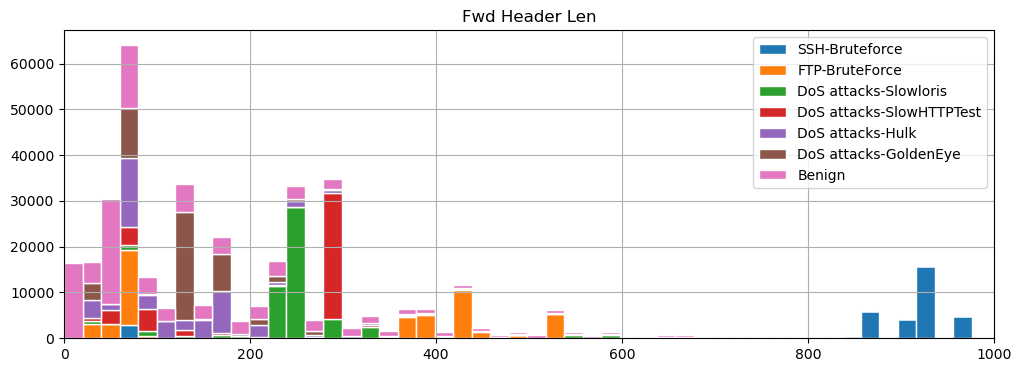

In [32]:
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce'

caracteris= 'Fwd Header Len'
#fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True,figsize=(12,4))
lim=1000
ylim=20000

pruebadf=dataset.loc[dataset[caracteris] < lim]
#brutedf=pruebadf.loc[pruebadf['Label'] == "SSH-Bruteforce"]
#Benigndf=pruebadf.loc[pruebadf['Label'] == "Benign"]

bin = 50


#pruebadf.hist(column=caracteris, ax = ax[0][0],bins = bin)
#brutedf.hist(column=caracteris, ax = ax[0][1],color="red",bins = bin)
#Benigndf.hist(column=caracteris, ax = ax[2],color="green",bins = bin)

#fig , ax =plt.subplots(nrows=1, ncols=1,figsize=(12,4))

#ax[0].hist(pruebadf['Fwd Header Len'],
#          edgecolor='white',
#        bins=bin)

#ax[2].set_title(caracteris+ " en tráfico benigno")
plt.rcParams["figure.figsize"] = (12,4)

n, bins, patches = plt.hist(
    [pruebadf.loc[pruebadf['Label'] == 'SSH-Bruteforce','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'FTP-BruteForce','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-SlowHTTPTest','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Hulk','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-GoldenEye','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'Benign','Fwd Header Len']],
    stacked=True,
    label=['SSH-Bruteforce', 'FTP-BruteForce', 'DoS attacks-Slowloris','DoS attacks-SlowHTTPTest','DoS attacks-Hulk'
           ,'DoS attacks-GoldenEye','Benign'],
    edgecolor='white',
    bins = bin,
    )

plt.legend()
plt.grid()
plt.title(caracteris)
plt.xlim([0, lim])
#fig.savefig("Fwd_header_len.pdf")

count    4.284820e+05
mean     1.240013e+15
std      6.762598e+14
min      0.000000e+00
25%      1.366968e+15
50%      1.644069e+15
75%      1.644344e+15
max      1.646939e+15
Name: Idle Mean, dtype: float64


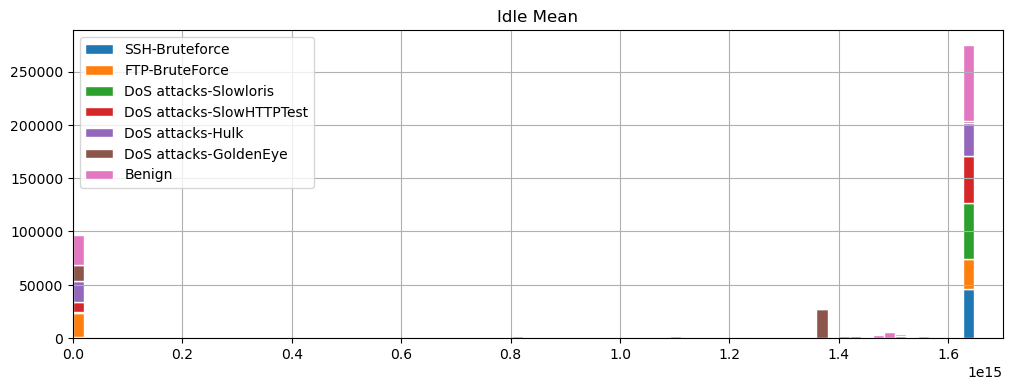

In [94]:
caracteris= 'Idle Mean'

lim=1.7e15

pruebadf=dataset.loc[dataset[caracteris] < lim]
print(dataset[caracteris].describe())
bin = 80

plt.rcParams["figure.figsize"] = (12,4)

n, bins, patches = plt.hist(
    [pruebadf.loc[pruebadf['Label'] == 'SSH-Bruteforce',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'FTP-BruteForce',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-SlowHTTPTest',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Hulk',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-GoldenEye',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'Benign',caracteris]],
    stacked=True,
    label=['SSH-Bruteforce', 'FTP-BruteForce', 'DoS attacks-Slowloris','DoS attacks-SlowHTTPTest','DoS attacks-Hulk'
           ,'DoS attacks-GoldenEye','Benign'],
    edgecolor='white',
    bins = bin,
    )

plt.legend()
plt.grid()
plt.title(caracteris)
plt.xlim([0, lim])
plt.savefig("Idle Mean.pdf")

(0.0, 1000.0)

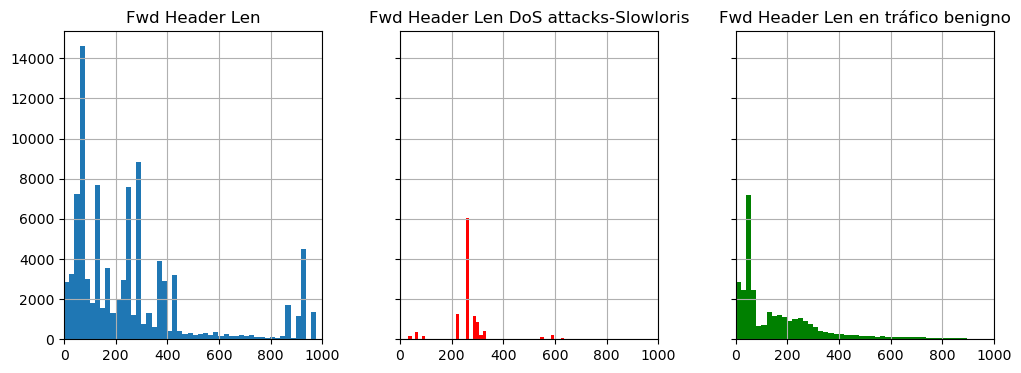

In [34]:
#Histograma del FWdSigSezSize

caracteris= 'Fwd Header Len'
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(12,4))
lim=1000

pruebadf=dataset1.loc[dataset1[caracteris] < lim]
evildf=pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris']
Benigndf=pruebadf.loc[pruebadf['Label'] == "Benign"]

bin = 50


pruebadf.hist(column=caracteris, ax = ax[0],bins = bin)
evildf.hist(column=caracteris, ax = ax[1],color="red",bins = bin)
Benigndf.hist(column=caracteris, ax = ax[2],color="green",bins = bin)


ax[0].set_title(caracteris )
ax[1].set_title( caracteris+" DoS attacks-Slowloris")
ax[2].set_title(caracteris+ " en tráfico benigno")

ax[0].set_xlim([0, lim])

ax[1].set_xlim([0, lim])

ax[2].set_xlim([0, lim])


In [35]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,data1,feature_names=features, out_names=Labels)
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce' FWD header Len 936, BWD packt Len STD 176, Fwd Pack Len std 166


In [36]:
y_preddata=model.predict(data1)


In [37]:
num=25;

shap.force_plot(explainer.expected_value, shap_values[num,:]  ,data1[num,:],feature_names=features, figsize=[15,28])
#1 maligno #0 benigno

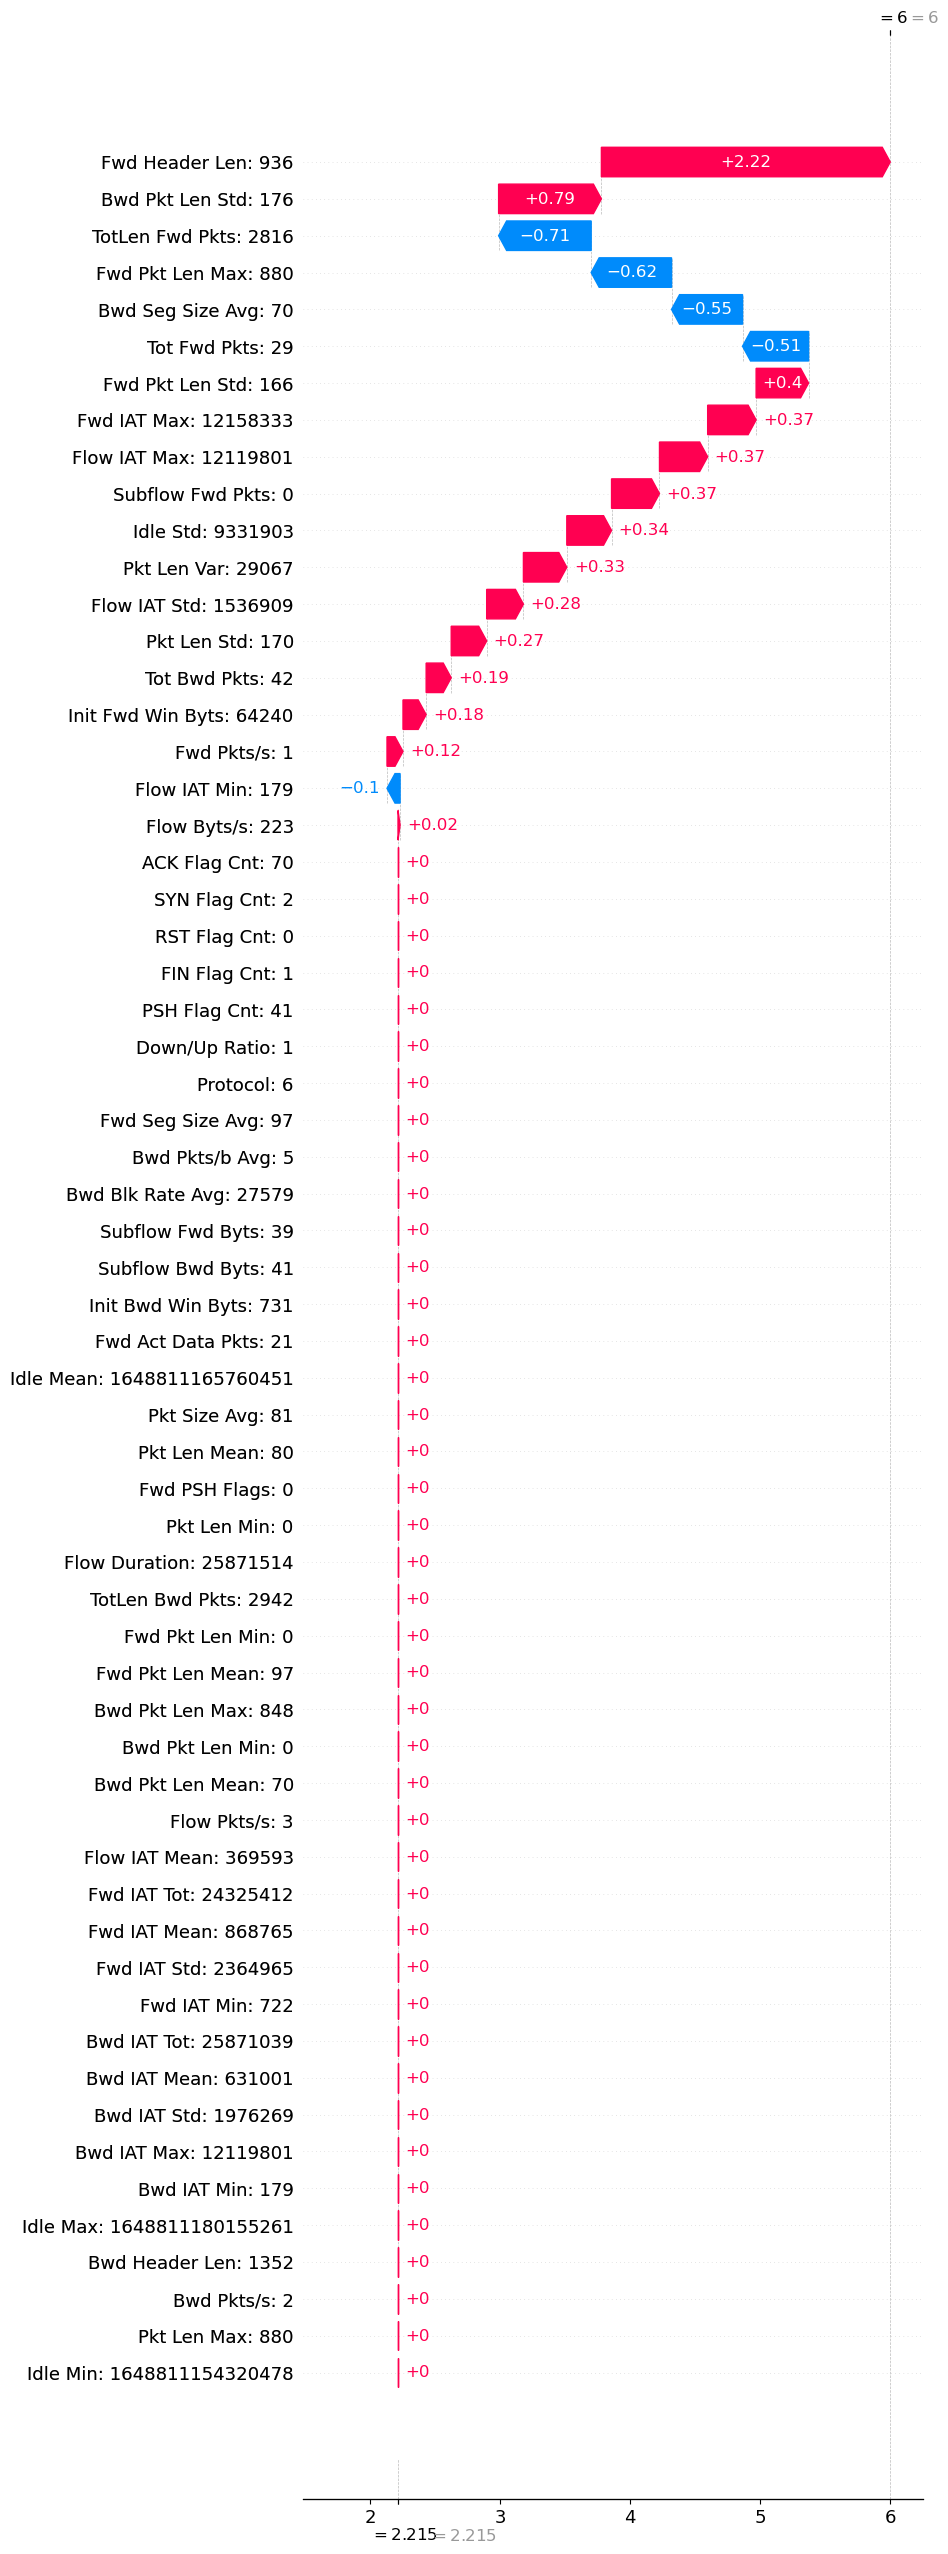

In [123]:
feature = [a + ": " + str(int(b)) for a,b in zip(features, data1[num].round(0))]

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[num],feature_names=feature, max_display=80)


DoS attacks-Hulk


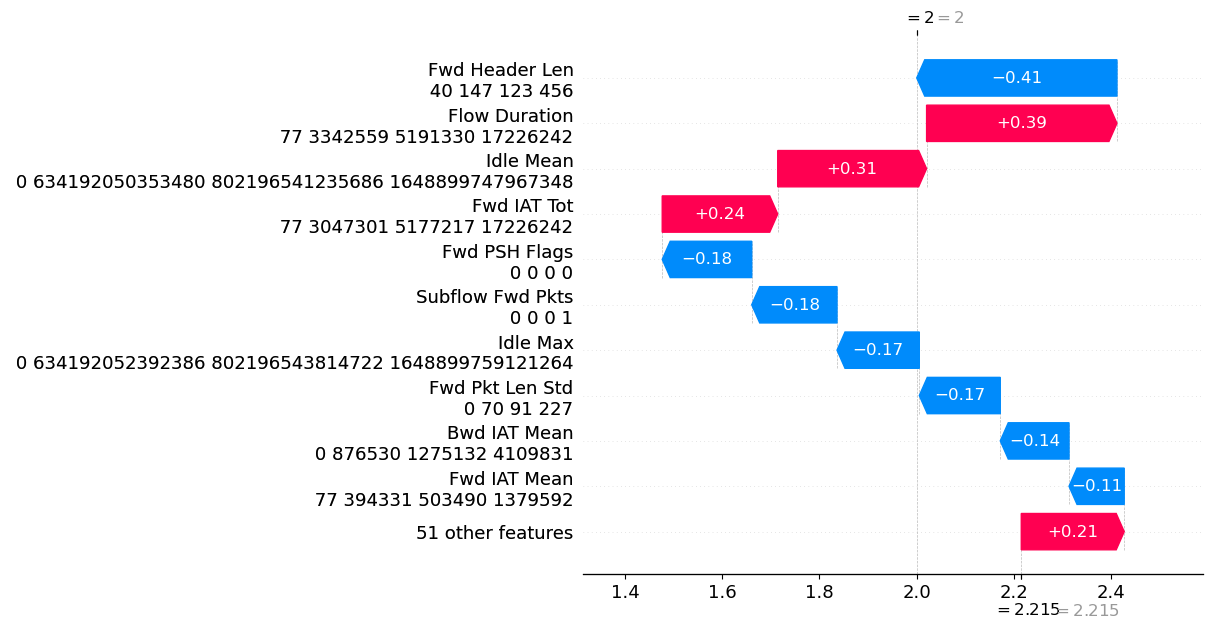

In [122]:
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce
nuevo_shap=shap_values[0]*0
nuevo_data = data1[0]*0
nuevo_min=data1[0]
nuevo_max=nuevo_data
nuevo_std=nuevo_data

acum=0
ata=2
margen=0.2
for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        nuevo_shap=nuevo_shap+shap_values[i]
        nuevo_data=nuevo_data+data1[i]
        nuevo_min =np.minimum(nuevo_min,data1[i])
        nuevo_max =np.maximum(nuevo_max,data1[i])
        acum=acum+1
nuevo_shap=nuevo_shap/acum
nuevo_data=nuevo_data/acum
#Calculo del STD
for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        
        nuevo_std= nuevo_std+((data1[i]-nuevo_data)**2)
       
nuevo_std = (nuevo_std/acum)**0.5

feature = [a + "\n " + str(int(b)) +" " +str(int(c)) +" " +str(int(d))+ " " +str(int(e)) 
           for a,b,c,d,e in zip(features,nuevo_min,nuevo_data,nuevo_std,nuevo_max)]
print(Labels[ata])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, nuevo_shap,feature_names=feature, max_display=11)
#Revisar que significa el explainer expecteed value

In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree


In [41]:
#clf = tree.DecisionTreeClassifier(random_state=0)
n_estimators=200
clf = RandomForestClassifier(random_state=0,n_estimators=n_estimators,max_depth=6)
#    max_features
clf = clf.fit(X_trainArr,Y_train)


KeyboardInterrupt: 

In [ ]:
X_testArr = X_test.to_numpy()
Y_pred=clf.predict(X_trainArr)
LabelsArr = np.array(Labels)

y_testree1 = []
for i in range(0, Y_train.size):
    for j in range(0, LabelsArr.size):
        if Y_train[i] == j:
            y_testree1.append(Labels[j])

y_predtree1 = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_predtree1.append(Labels[j])

In [ ]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))
accuracy_modelo=accuracy_score(Y_train, Y_pred)
print(accuracy_modelo)
# 0.91882740 max 5

In [ ]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1,figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True,figsize= (17,17))

In [ ]:
X_testArr = X_test.to_numpy()
Y_pred=clf.predict(X_testArr)
LabelsArr = np.array(Labels1)

y_testree1 = []
for i in range(0, Y_test.size):
    for j in range(0, LabelsArr.size):
        if Y_test[i] == j:
            y_testree1.append(Labels[j])

y_predtree1 = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_predtree1.append(Labels[j])

In [ ]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))


In [ ]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1,figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True,figsize= (17,17))

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
accuracy_ant=0
accuracy_med=0
accuracy_pon=0
accuracy_pon_ant=0
best=0
dist_ant=1000
from tqdm import tqdm
for i in tqdm(range(n_estimators)):
    aux_clf = clf.estimators_[i]
    y_pred_train=aux_clf.predict(X_trainArr)
    y_pred_test=aux_clf.predict(X_testArr)
    accuracy=accuracy_score(Y_test, y_pred_test)
    
    accuracy_train=accuracy_score(Y_train, y_pred_train)
    accuracy_pon = accuracy_train*accuracy
    
    dist=abs(accuracy_modelo-accuracy)
    
    if accuracy_pon > accuracy_pon_ant:
        pon=i
        accuracy_pon_ant=accuracy_pon
        accuracy_pon_train = accuracy_train
        accuracy_pon_test = accuracy
        
    if accuracy > accuracy_ant:
        best = i
        accuracy_ant=accuracy
        
    if dist < dist_ant:
        med = i
        accuracy_med=accuracy
        dist_ant = dist

aux_clf = clf.estimators_[med]
y_pred_test=aux_clf.predict(X_testArr)        
accuracy=accuracy_score(Y_test, y_pred_test)    
accuracy_med=accuracy


print("hola")
fig = plt.figure(figsize=(45,10))
_ = tree.plot_tree(clf.estimators_[best], feature_names=features,  class_names=Labels,filled=True)

fig2 = plt.figure(figsize=(45,10))
_ = tree.plot_tree(clf.estimators_[med], feature_names=features,  class_names=Labels,filled=True)

fig3 = plt.figure(figsize=(70,10))
_ = tree.plot_tree(clf.estimators_[pon], feature_names=features,  class_names=Labels,filled=True)

fig.suptitle('Arbol numero: '+str(best)+' Precision: '+ str(round(accuracy_ant,3)))
fig.savefig("decistion_ataques.pdf")

fig2.suptitle('Arbol numero: '+str(med)+' Precision: '+ str(round(accuracy_med,3)))
fig2.savefig("decistion_ataques_mean.pdf")

fig3.suptitle('Arbol numero: '+str(pon)+' Precision test: '+ str(round(accuracy_pon_test,3)) +' Precision entrenamiento: '+ str(round(accuracy_pon_train,3)))
#fig3.savefig("decistion_ataques_pon.pdf")

In [ ]:
model = tree.DecisionTreeClassifier(random_state=0,max_depth=10)
#    max_features
model = model.fit(X_trainArr,Y_train)


In [ ]:
Y_pred_test=model.predict(X_trainArr)
accuracy=accuracy_score(Y_train, Y_pred_test)
print("precision entrenamiento",accuracy)
y_pred_test=model.predict(X_testArr)
accuracy=accuracy_score(Y_test, y_pred_test)
print("precision test",accuracy)

In [ ]:
fig2 = plt.figure(figsize=(45,10))
_ = tree.plot_tree(model, feature_names=features,  class_names=Labels,filled=True)

fig.suptitle('Arbol numero: normal '+' Precision: '+ str(round(accuracy,3)))
#fig.savefig("decistion_tree_normal_ataque.pdf")